<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/is04_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An example of a neural network experiencing overfitting
A neural network can easily experience overfitting depending on the balance between the complexity of the problem and the complexity of the model. Here, we will test what happens in a regression problem as we increase model complexity (number of nodes and layers in the hidden layers). Generally, overfitting occurs when the model's complexity exceeds that of the problem. However, since the complexity of the problem is not known in advance, determining hyperparameters like the number of nodes and layers is not straightforward.

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [9]:
# Generate synthetic data (sin wave with noise)
np.random.seed(42)
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + 0.1 * np.random.normal(size=x.shape)

# Use a smaller portion for training to induce overfitting
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).reshape(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)


In [10]:
# Define a simple neural network for regression
class SimpleNN(nn.Module):
    def __init__(self, hidden_layers=1, hidden_units=10):
        super(SimpleNN, self).__init__()
        layers = [nn.Linear(1, hidden_units), nn.ReLU()]
        for _ in range(hidden_layers - 1):
            layers += [nn.Linear(hidden_units, hidden_units), nn.ReLU()]
        layers += [nn.Linear(hidden_units, 1)]
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Training function
def train_model(model, X_train, y_train, X_test, y_test, epochs=3000, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_losses, test_losses = [], []

    for epoch in range(epochs):
        # Training step
        model.train()
        optimizer.zero_grad()
        predictions = model(X_train)
        loss = criterion(predictions, y_train)
        loss.backward()
        optimizer.step()

        # Record train and test loss for analysis
        model.eval()
        with torch.no_grad():
            train_loss = criterion(model(X_train), y_train).item()
            test_loss = criterion(model(X_test), y_test).item()
        train_losses.append(train_loss)
        test_losses.append(test_loss)

    return train_losses, test_losses

In [11]:
# Plot function for results
def plot_results(model, X_train, y_train, X_test, y_test, title=""):
    # Plot true data and model predictions
    plt.scatter(X_train, y_train, color="blue", label="Train Data")
    plt.scatter(X_test, y_test, color="red", label="Test Data")

    # Plot model predictions over full range for visualization
    X_full = torch.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
    with torch.no_grad():
        y_pred = model(X_full)
    plt.plot(X_full.numpy(), y_pred.numpy(), color="green", label="Model Prediction")
    plt.title(title)
    plt.legend()
    plt.show()


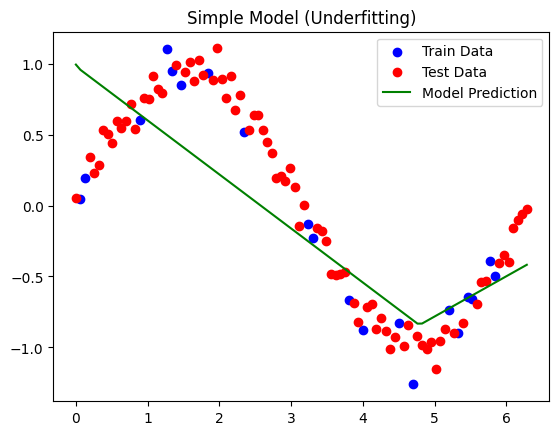

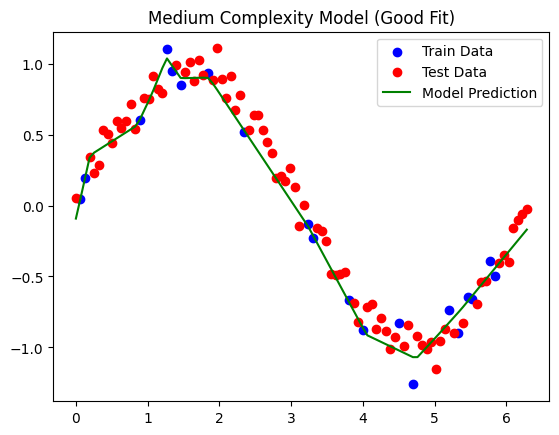

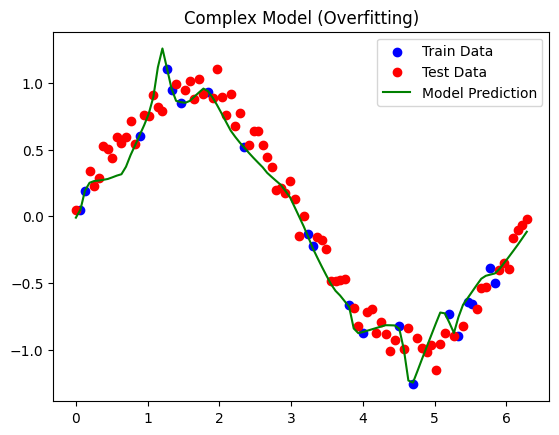

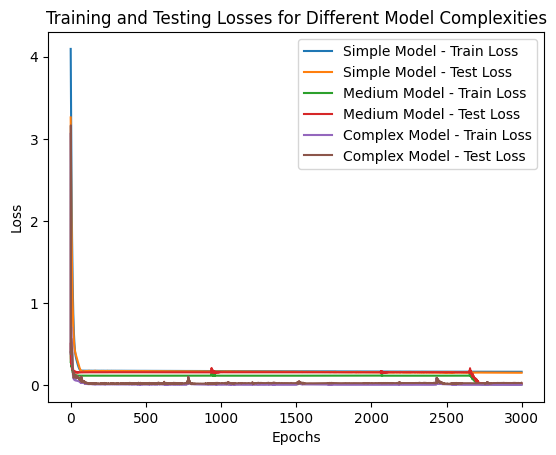

In [12]:

# Define and train models with different complexity
# Model 1: Simple model, low complexity (Underfitting)
model_simple = SimpleNN(hidden_layers=1, hidden_units=5)
train_losses_simple, test_losses_simple = train_model(model_simple, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)
plot_results(model_simple, X_train, y_train, X_test, y_test, "Simple Model (Underfitting)")

# Model 2: Complex model, medium complexity (Good fit)
model_medium = SimpleNN(hidden_layers=2, hidden_units=20)
train_losses_medium, test_losses_medium = train_model(model_medium, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)
plot_results(model_medium, X_train, y_train, X_test, y_test, "Medium Complexity Model (Good Fit)")

# Model 3: High complexity model, prone to overfitting
model_complex = SimpleNN(hidden_layers=5, hidden_units=100)
train_losses_complex, test_losses_complex = train_model(model_complex, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor)
plot_results(model_complex, X_train, y_train, X_test, y_test, "Complex Model (Overfitting)")

# Plot training and testing losses for each model to observe overfitting
plt.plot(train_losses_simple, label="Simple Model - Train Loss")
plt.plot(test_losses_simple, label="Simple Model - Test Loss")
plt.plot(train_losses_medium, label="Medium Model - Train Loss")
plt.plot(test_losses_medium, label="Medium Model - Test Loss")
plt.plot(train_losses_complex, label="Complex Model - Train Loss")
plt.plot(test_losses_complex, label="Complex Model - Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Testing Losses for Different Model Complexities")
plt.show()
